#### 1. Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### 2. Чтение набора данных

In [2]:
url = "https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/netflix.csv"
df = pd.read_csv(url)
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,20152022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0
4,Cyberpunk: Edgerunners,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0


#### 3. Первые 7 строк набора данных

In [3]:
df.head(7)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,20152022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0
4,Cyberpunk: Edgerunners,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0
5,The Sandman,2022.0,TV-MA,45.0,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358.0
6,Rick and Morty,2013.0,TV-MA,23.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160.0


#### 4. Последние 5 строк набора данных

In [4]:
df.tail(5)

,title,year,certificate,duration,genre,rating,description,stars,votes
9952,The Imperfects,2022.0,TV-MA,45.0,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",3130.0
9953,The Walking Dead,20102022.0,TV-MA,44.0,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067.0
9954,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199898.0
9955,Supernatural,20052020.0,TV-14,44.0,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...",439601.0
9956,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9786.0


#### 5. Поля набора данных

In [5]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

#### 6. Размер набора данных (количество полей и строк)

In [6]:
df.shape

(9957, 9)

#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [7]:
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')[0]
df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)')[0]
df['votes'] = df['votes'].astype(str).str.replace(',', '', regex=False)
df['rating'] = df['rating'].astype(str).str.replace(',', '.', regex=False)
for col in ['year', 'duration', 'votes', 'rating']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

fields = pd.DataFrame({
    'Поле': df.columns,
    'Тип данных': df.dtypes.astype(str),
    'Назначение': [
        'Название фильма/шоу',
        'Год выпуска',
        'Официальный рейтинг',
        'Продолжительность (в минутах или сезонах)',
        'Жанр/описание категории',
        'Рейтинг IMDB',
        'Описание сюжета',
        'Список актёров',
        'Количество голосов пользователей'
    ][:len(df.columns)]
})
fields

,Поле,Тип данных,Назначение
title,title,object,Название фильма/шоу
year,year,float64,Год выпуска
certificate,certificate,object,Официальный рейтинг
duration,duration,float64,Продолжительность (в минутах или сезонах)
genre,genre,object,Жанр/описание категории
rating,rating,float64,Рейтинг IMDB
description,description,object,Описание сюжета
stars,stars,object,Список актёров
votes,votes,float64,Количество голосов пользователей


#### 8. Информация о наборе данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9326 non-null   float64
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   float64
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   float64
dtypes: float64(4), object(5)
memory usage: 700.2+ KB


#### 9. Проверка наличия пропусков в данных

In [9]:
df.isnull().sum()

,0
title,0
year,631
certificate,3453
duration,2036
genre,73
rating,1173
description,0
stars,0
votes,1173


#### 10. Если вы обнаружили пропуски в данных, то удалите их

In [10]:
df = df.dropna()

#### 11. Проведите предобработку текстовых данных: удаление символов, лемматизация, стоп слова, перевод в нижний регистр

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z ]', '', text)
        text = text.lower()
        words = text.split()
        words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
        return ' '.join(words)
    return text
df['title_clean'] = df['title'].apply(clean_text)
df.head(3)

,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,cobra kai
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,crown
2,Better Call Saul,2015.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,better call saul


#### 12. Фильтрация. Выберите все строки таблицы, для которых значение поля votes больше 922040.0

In [12]:
df[df['votes'] > 922040.0]

,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean
7,Breaking Bad,2008.0,TV-MA,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831340.0,breaking bad
10,Stranger Things,2016.0,TV-14,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149889.0,stranger thing
12,The Walking Dead,2010.0,TV-MA,44.0,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970060.0,walking dead
20,The Lord of the Rings: The Fellowship of the Ring,2001.0,PG-13,178.0,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055.0,lord ring fellowship ring
26,Friends,1994.0,TV-14,22.0,"Comedy, Romance",8.9,Follows the personal and professional lives of...,"['Jennifer Aniston, ', 'Courteney Cox, ', 'Lis...",979424.0,friend
57,The Lord of the Rings: The Return of the King,2003.0,PG-13,201.0,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,lord ring return king
78,The Lord of the Rings: The Two Towers,2002.0,PG-13,179.0,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,lord ring two tower
96,Titanic,1997.0,PG-13,194.0,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...",1158746.0,titanic
113,Jurassic Park,1993.0,PG-13,127.0,"Action, Adventure, Sci-Fi",8.2,A pragmatic paleontologist touring an almost c...,"['Steven Spielberg', '| ', ' Stars:', 'Sam ...",978402.0,jurassic park
153,Gladiator,2000.0,R,155.0,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,gladiator


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля title равно Top Gear

In [13]:
df[df['title'] == 'Top Gear']

,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean
502,Top Gear,2002.0,TV-PG,60.0,"Adventure, Comedy, Reality-TV",8.7,The hosts talk about everything car-related. F...,"['Jeremy Clarkson, ', 'Richard Hammond, ', 'Ja...",118264.0,top gear
8062,Top Gear,2002.0,TV-PG,45.0,"Adventure, Comedy, Reality-TV",7.1,The Top Gear team tests the Citroën Berlingo M...,"['Brian Klein, ', 'Richard Heeley, ', 'Chris H...",337.0,top gear
8063,Top Gear,2002.0,TV-PG,45.0,"Adventure, Comedy, Reality-TV",7.0,The Noble M12 GTO awaits Jeremy. The Stig gets...,"['Brian Klein, ', 'Richard Heeley, ', 'Chris H...",282.0,top gear
8068,Top Gear,2002.0,TV-PG,65.0,"Adventure, Comedy, Reality-TV",7.2,The team find out which religion is the fastes...,"['Brian Klein, ', 'Richard Heeley, ', 'Chris H...",223.0,top gear
8072,Top Gear,2002.0,TV-PG,49.0,"Adventure, Comedy, Reality-TV",7.7,Cheap thrills are this week's theme. James May...,"['Brian Klein, ', 'Andrew Fettis, ', 'Richard ...",270.0,top gear
...,...,...,...,...,...,...,...,...,...,...
9547,Top Gear,2002.0,TV-PG,51.0,"Adventure, Comedy, Reality-TV",8.2,Reviews the prototype V12 Volkswagon Golf.,"['Brian Klein, ', 'Phil Churchward, ', 'Babak ...",245.0,top gear
9661,Top Gear,2002.0,TV-PG,50.0,"Adventure, Comedy, Reality-TV",8.7,The team revisit one of their most ridiculous ...,"['Brian Klein, ', 'Phil Churchward, ', 'Graham...",317.0,top gear
9804,Top Gear,2002.0,TV-PG,50.0,"Adventure, Comedy, Reality-TV",8.3,Rolling Stones member Ronnie Wood is the Star ...,"['Brian Klein, ', 'James Bryce, ', 'Phil Churc...",244.0,top gear
9849,Top Gear,2002.0,TV-PG,52.0,"Adventure, Comedy, Reality-TV",9.1,"Jeremy, James and Richard each buy a used two-...","['James Bryce', '| ', ' Stars:', 'Jeremy Cl...",630.0,top gear


#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля description равно Add a Plot и значение поля title равно Top Gear

In [14]:
df[(df['description'] == 'Add a Plot') & (df['title'] == 'Top Gear')]

,title,year,certificate,duration,genre,rating,description,stars,votes,title_clean


#### 15. Получите все уникальные значения поля  title и подсчитайте частоту появления каждого их них

In [15]:
df['title'].value_counts()

,count
title,
Top Gear,84
Bleach,67
Avatar: The Last Airbender,53
Johnny Test,34
She-Ra and the Princesses of Power,26
...,...
A California Christmas: City Lights,1
The Legend of Drunken Master,1
Drive Hard: The Maloof Way,1


#### 16. Выполните группировку набора данных одновременно по полям description и title. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [16]:
df.groupby(['description','title'])['duration'].agg(['min','max','median'])

,,min,max,median
description,title,,,
"""All the Freckles in the World,"" set in 1990s Mexico City, is the story of a young-teen boy who is trying to get the attention of the prettiest girl at his school.",All the Freckles in the World,91.0,91.0,91.0
"""Good Witch"" will take viewers on a new magical journey with Cassie Nightingale and her daughter Grace. When Dr. Sam Radford moves in next door to Grey House with his son, they are charmed by the 'magical' mother-daughter duo.",Good Witch,48.0,48.0,48.0
"""Heidi (Osment), who initially left her small town of Pleasant Valley with the dream of one day becoming a successful painter, has put her own art on hold to excel as an art gallery curator... See full summary »",Christmas Wonderland,120.0,120.0,120.0
"""In the deep jungles of South East Asia a blood thirsty mercenary Sebastian, hunts for the thrill of the chase and victims to sell into slavery. In one operation he kills a peaceful local ... See full summary »",The Lazarus Papers,90.0,90.0,90.0
"""King of Bollywood"" Shah Rukh Khan opens up about his rise to fame, his family and his billions of fans as he and Dave meet up in Mumbai and New York.",My Next Guest Needs No Introduction with David Letterman,61.0,61.0,61.0
...,...,...,...,...
"Zig, a famished hyena comes up with the craziest plans to make a meal out of Marina, the carefree mermaid. But that's forgetting all about Sharko, the muscly shark who will do anything to protect her.",Zig & Sharko,7.0,7.0,7.0
Zuko makes a decision about his future. Aang reunites with many of his old friends in a full-scale invasion of the Fire Nation capitol to coincide with an eclipse which will remove the Fire Nation's powers.,Avatar: The Last Airbender,22.0,22.0,22.0
Zuno testifies in front of a grand jury. Isabella tries to broker a deal with Enedina. Félix makes a daring offer to a U.S. contact.,Narcos: Mexico,60.0,60.0,60.0


#### 17. Постройте поле корреляции (тепловая карта) для числовых полей

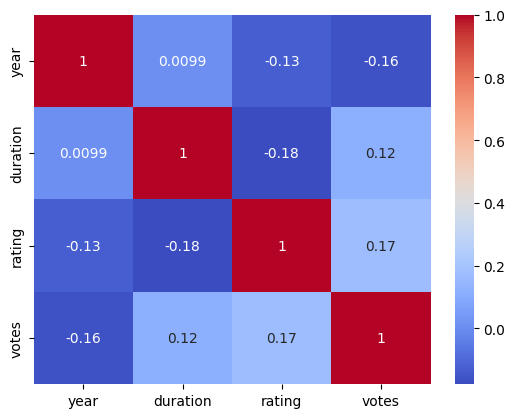

In [17]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### 18. Постройте гистограмму по полю year

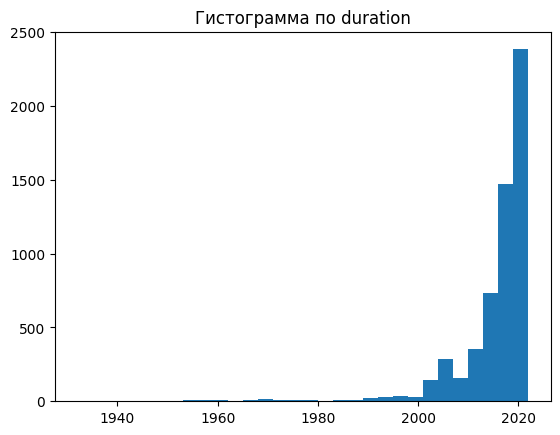

In [18]:
plt.hist(df['year'], bins=30)
plt.title('Гистограмма по duration')
plt.show()

#### 19. Постройте точечную диаграмму для полей rating и year

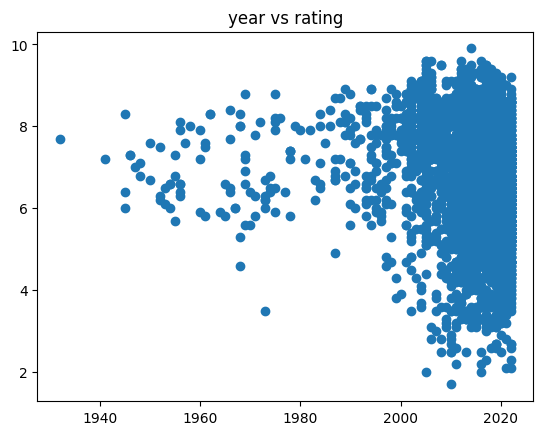

In [19]:
plt.scatter(df['year'], df['rating'])
plt.title('year vs rating')
plt.show()

#### 20. Постройте диаграмму ящик с усами поля rating

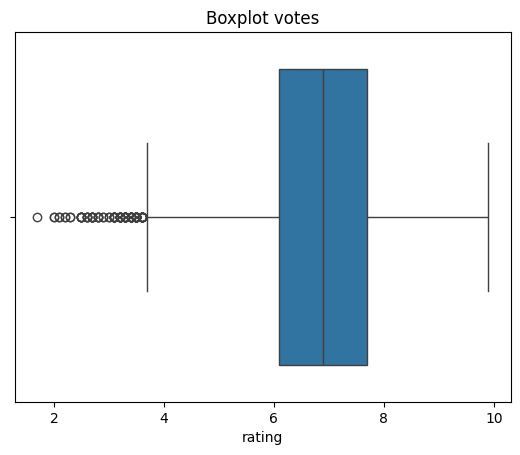

In [20]:
sns.boxplot(x=df['rating'])
plt.title('Boxplot votes')
plt.show()

#### 21. Постройте матрицу диаграммы рассеяния

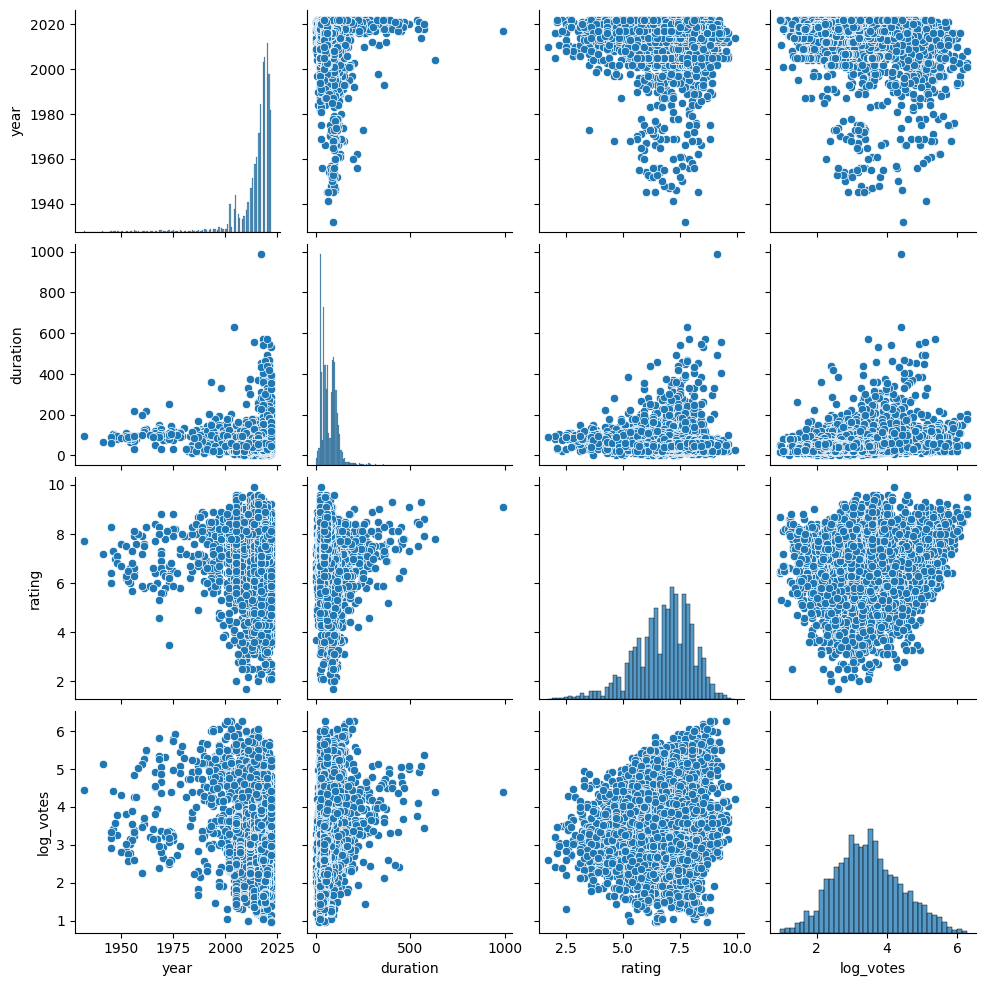

In [21]:
df['log_votes'] = np.log10(df['votes'] + 1)
sns.pairplot(df[['year', 'duration', 'rating', 'log_votes']])
plt.show()

#### 22. Удалите поля, которые будут неинформативны для построения модели машинного обучения. Оставьте такое количество полей, которое будет для вас удобным при построении модели машинного обучения

In [22]:
df_ml = df.drop(columns=['title','stars','title_clean'])
df_ml.head()

,year,certificate,duration,genre,rating,description,votes,log_votes
0,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,177031.0,5.248052
1,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,199885.0,5.300782
2,2015.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,501384.0,5.700171
3,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,9773.0,3.990072
4,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,15413.0,4.187915


#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [23]:
cat_cols = df_ml.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
df_ml.head()


,year,certificate,duration,genre,rating,description,votes,log_votes
0,2018.0,11,30.0,21,8.5,2267,177031.0,5.248052
1,2016.0,13,58.0,168,8.7,2646,199885.0,5.300782
2,2015.0,13,46.0,238,8.9,4868,501384.0,5.700171
3,2022.0,13,356.0,360,5.9,5402,9773.0,3.990072
4,2022.0,13,24.0,112,8.6,112,15413.0,4.187915


#### 24. Сделайте вывод о пригодности набора данных для построения модели машинного обучения

Набор данных после очистки и кодирования полностью готов для построения моделей машинного обучения. Все категориальные признаки преобразованы в числовой формат, пропущенные значения удалены, числовые поля приведены к корректным типам. Объём данных является достаточным для проведения анализа и обучения моделей.


# Часть II. Построение модели машинного обучения для набора данных: Netflix

#### 25. Разделить выборку на признаки (Х) и результат (Y)

In [24]:
df_ml['rating_class'] = pd.cut(
    df_ml['rating'],
    bins=[0, 5, 7, 8.5, 10],
    labels=['низкий', 'средний', 'высокий', 'топ']
)

X = df_ml.drop(columns=['rating', 'rating_class'])
y = df_ml['rating_class']

y.value_counts()

,count
rating_class,
средний,2574
высокий,2417
низкий,482
топ,281


#### 26. Разделить на обучающую и тестовую выборки

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (4603, 7)
Размер тестовой выборки: (1151, 7)


#### 27. Сформировать модель машинного обучения

In [26]:
model = KNeighborsClassifier(n_neighbors=7)

#### 28. Обучить модель

In [27]:
model.fit(X_train, y_train)
print("Модель KNN обучена.")

Модель KNN обучена.


#### 29. Оценить качество модели

In [28]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность модели (Accuracy): {acc:.3f}\n")

print("Отчёт по классам:")

print(classification_report(y_test, y_pred))

Точность модели (Accuracy): 0.483

Отчёт по классам:
              precision    recall  f1-score   support

     высокий       0.47      0.59      0.52       484
      низкий       0.27      0.08      0.13        96
     средний       0.52      0.50      0.51       515
         топ       0.43      0.11      0.17        56

    accuracy                           0.48      1151
   macro avg       0.42      0.32      0.33      1151
weighted avg       0.47      0.48      0.47      1151



#### 30. Выполнить предсказание для трех фраз

In [29]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head(3)

,Actual,Predicted
1962,высокий,высокий
2753,средний,высокий
8201,высокий,высокий


#### 31. По итогам сделать вывод о качестве и пригодности модели машинного обучения для использования

### Оценка качества модели

Модель **KNN** продемонстрировала невысокие результаты классификации.

**Общая точность (Accuracy):** `0.483`

#### Анализ метрик:
- Классы **«высокий»** и **«средний»** определяются умеренно хорошо (f1-score ≈ 0.5).  
- Классы **«низкий»** и **«топ»** распознаются слабо — значения `recall` и `f1-score` крайне низкие.  
- Наблюдается значительный **дисбаланс классов**, что влияет на способность модели корректно классифицировать редкие категории.  

#### Вывод:
Модель **KNN** показывает **низкое качество** предсказаний и не подходит для точной классификации рейтингов.  
Возможные причины:
- высокая чувствительность к масштабу и распределению признаков;
- отсутствие нормализации данных;
- дисбаланс классов.

#### 32. Постройте еще одну модель машинного обучения, сравните той, что была в задании и сделайте вывод о том, какая модель лучше

=== Linear Regression ===
MSE: 0.233
R²: 0.846

Сравнение реальных и предсказанных значений:
   Actual  Predicted
0     7.1   7.614227
1     7.5   7.655841
2     6.7   6.098214
3     4.5   4.192543
4     6.4   6.220149
5     6.1   6.249617
6     7.9   7.733394
7     6.8   6.346417
8     7.2   7.745137
9     5.8   6.370176


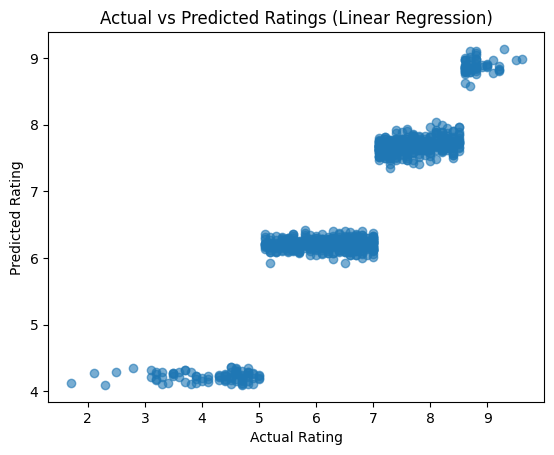

In [30]:
X = df_ml.drop(columns=['rating'])
y = df_ml['rating']

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression ===")
print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")

comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})
print("\nСравнение реальных и предсказанных значений:")
print(comparison)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings (Linear Regression)")
plt.show()


### Вывод о сравнении моделей Linear Regression и классификатора (Accuracy 0.483)

Модель **Linear Regression** показала высокое качество предсказания количественного рейтинга:
- **MSE:** 0.233  
- **R²:** 0.846  
- Предсказанные значения близки к реальным, что видно на графике «Actual vs Predicted Rating».  
- Ошибки распределены равномерно, а коэффициент детерминации указывает на то, что модель объясняет около 85% вариации рейтингов.  
Модель адекватно описывает линейные зависимости между признаками и рейтингом.

Модель **классификации (Accuracy = 0.483)** показала более низкое качество:
- Метрики F1 низкие (0.13–0.52), особенно для классов *«низкий»* и *«топ»*.  
- Частые ошибки связаны с перекрытием соседних категорий рейтинга.  
- Общая точность менее 50% указывает на слабую способность модели различать классы.

**Сравнение:**  
Линейная регрессия лучше справляется с прогнозированием рейтингов, так как работает с числовой зависимостью и демонстрирует устойчивые результаты.  
Классификационная модель теряет информацию при преобразовании рейтинга в категории и менее точна.  

**Вывод:**  
Для задачи предсказания рейтинга фильмов более подходящей является **модель Linear Regression** - она обеспечивает высокое качество, интерпретируемость и стабильность результатов.
